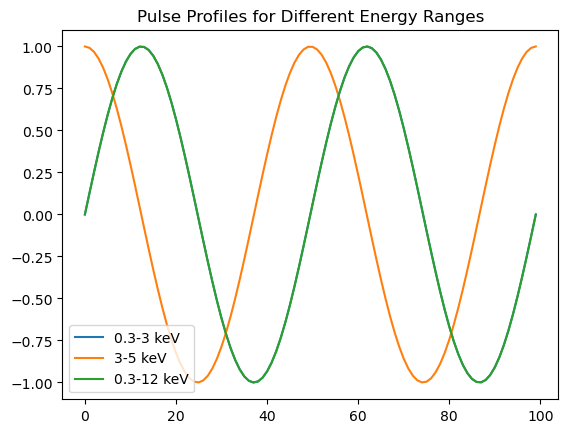

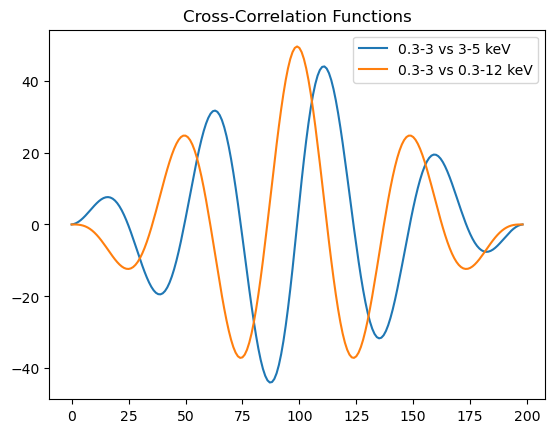

Phase Shift between 0.3-3 and 3-5 keV: 12 bins
Phase Shift between 0.3-3 and 0.3-12 keV: 0 bins


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated pulse profiles for different energy ranges
energy_range_03_3 = np.sin(np.linspace(0, 4 * np.pi, 100))
energy_range_3_5 = np.cos(np.linspace(0, 4 * np.pi, 100))
energy_range_03_12 = np.sin(np.linspace(0, 4 * np.pi, 100))

# Normalize profiles
energy_range_03_3 /= np.max(energy_range_03_3)
energy_range_3_5 /= np.max(energy_range_3_5)
energy_range_03_12 /= np.max(energy_range_03_12)

# Cross-correlation for each pair
cross_corr_03_3_3_5 = np.correlate(energy_range_03_3, energy_range_3_5, mode='full')
cross_corr_03_3_03_12 = np.correlate(energy_range_03_3, energy_range_03_12, mode='full')

# Find phase shifts
shift_03_3_3_5 = np.argmax(cross_corr_03_3_3_5) - len(energy_range_03_3) + 1
shift_03_3_03_12 = np.argmax(cross_corr_03_3_03_12) - len(energy_range_03_3) + 1

# Plotting
plt.plot(energy_range_03_3, label='0.3-3 keV')
plt.plot(energy_range_3_5, label='3-5 keV')
plt.plot(energy_range_03_12, label='0.3-12 keV')
plt.legend()
plt.title('Pulse Profiles for Different Energy Ranges')
plt.show()

# Plot cross-correlation functions
plt.plot(cross_corr_03_3_3_5, label='0.3-3 vs 3-5 keV')
plt.plot(cross_corr_03_3_03_12, label='0.3-3 vs 0.3-12 keV')
plt.legend()
plt.title('Cross-Correlation Functions')
plt.show()

print(f'Phase Shift between 0.3-3 and 3-5 keV: {shift_03_3_3_5} bins')
print(f'Phase Shift between 0.3-3 and 0.3-12 keV: {shift_03_3_03_12} bins')


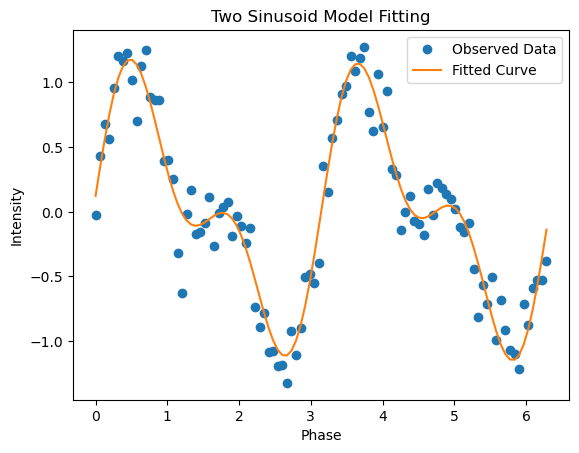

Fitted Parameters:
A1: 0.808674636151907
f1: 1.9637282735992645
phi1: 0.13154052370796118
A2: 0.5016633628051221
f2: 3.975575525166566
phi2: 0.03487957072084789


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Simulated pulse profile data
# Replace this with your actual data
x = np.linspace(0, 2 * np.pi, 100)
y_observed = 0.8 * np.sin(2 * x) + 0.5 * np.sin(4 * x) + 0.2 * np.random.normal(size=len(x))

# Define the model function (sum of two sinusoids)
def two_sin_model(x, A1, f1, phi1, A2, f2, phi2):
    return A1 * np.sin(f1 * x + phi1) + A2 * np.sin(f2 * x + phi2)

# Initial guess for parameters (amplitudes, frequencies, and phases)
initial_guess = [0.7, 2, 0, 0.4, 4, 0]

# Fit the model to the data using curve_fit
params, covariance = curve_fit(two_sin_model, x, y_observed, p0=initial_guess)

# Extract fitted parameters
A1_fit, f1_fit, phi1_fit, A2_fit, f2_fit, phi2_fit = params

# Generate the fitted curve
y_fitted = two_sin_model(x, A1_fit, f1_fit, phi1_fit, A2_fit, f2_fit, phi2_fit)

# Plot the observed and fitted data
plt.plot(x, y_observed, 'o', label='Observed Data')
plt.plot(x, y_fitted, label='Fitted Curve')
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Intensity')
plt.title('Two Sinusoid Model Fitting')
plt.show()

# Display the fitted parameters
print('Fitted Parameters:')
print(f'A1: {A1_fit}')
print(f'f1: {f1_fit}')
print(f'phi1: {phi1_fit}')
print(f'A2: {A2_fit}')
print(f'f2: {f2_fit}')
print(f'phi2: {phi2_fit}')



Shift between Curve 1 and Curve 2: -2 bins
Shift between Curve 1 and Curve 3: -6 bins
Shift between Curve 1 and Curve 4: -9 bins
Shift between Curve 2 and Curve 3: -2 bins
Shift between Curve 2 and Curve 4: -6 bins
Shift between Curve 3 and Curve 4: -3 bins


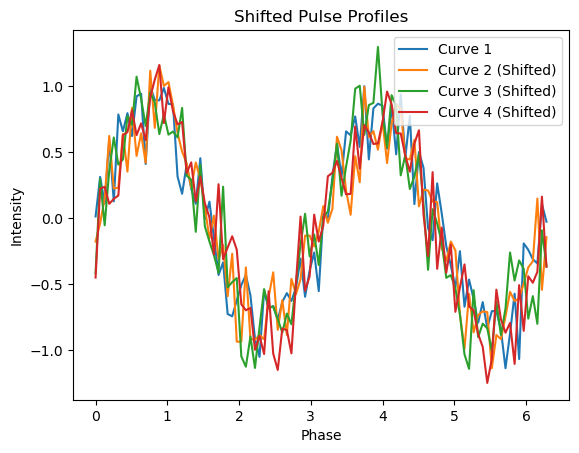

In [3]:
import numpy as np
from scipy.signal import correlate
import matplotlib.pyplot as plt

# Simulated pulse profile data
# Replace this with your actual data
x = np.linspace(0, 2 * np.pi, 100)
y1 = 0.8 * np.sin(2 * x) + 0.2 * np.random.normal(size=len(x))
y2 = 0.8 * np.sin(2 * x - 0.3) + 0.2 * np.random.normal(size=len(x))
y3 = 0.8 * np.sin(2 * x - 0.7) + 0.2 * np.random.normal(size=len(x))
y4 = 0.8 * np.sin(2 * x - 1.2) + 0.2 * np.random.normal(size=len(x))

# Function to find the shift between two curves using cross-correlation
def find_shift(curve1, curve2):
    cross_corr = correlate(curve1, curve2, mode='full')
    shift = np.argmax(cross_corr) - len(curve1) + 1
    return shift

# Calculate shifts between each pair of curves
shift_1_2 = find_shift(y1, y2)
shift_1_3 = find_shift(y1, y3)
shift_1_4 = find_shift(y1, y4)
shift_2_3 = find_shift(y2, y3)
shift_2_4 = find_shift(y2, y4)
shift_3_4 = find_shift(y3, y4)

# Display the shifts
print(f'Shift between Curve 1 and Curve 2: {shift_1_2} bins')
print(f'Shift between Curve 1 and Curve 3: {shift_1_3} bins')
print(f'Shift between Curve 1 and Curve 4: {shift_1_4} bins')
print(f'Shift between Curve 2 and Curve 3: {shift_2_3} bins')
print(f'Shift between Curve 2 and Curve 4: {shift_2_4} bins')
print(f'Shift between Curve 3 and Curve 4: {shift_3_4} bins')

# Plot the curves with the calculated shifts
plt.plot(x, y1, label='Curve 1')
plt.plot(x, np.roll(y2, shift_1_2), label='Curve 2 (Shifted)')
plt.plot(x, np.roll(y3, shift_1_3), label='Curve 3 (Shifted)')
plt.plot(x, np.roll(y4, shift_1_4), label='Curve 4 (Shifted)')
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Intensity')
plt.title('Shifted Pulse Profiles')
plt.show()


Shift between Curve 1 and Curve 2: -2 bins
Shift between Curve 1 and Curve 3: -4 bins
Shift between Curve 1 and Curve 4: -9 bins
Shift between Curve 2 and Curve 3: -2 bins
Shift between Curve 2 and Curve 4: -7 bins
Shift between Curve 3 and Curve 4: -3 bins


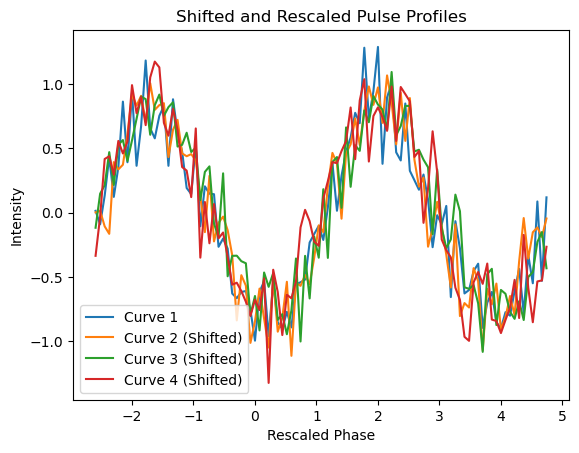

In [4]:
import numpy as np
from scipy.signal import correlate
import matplotlib.pyplot as plt

# Simulated pulse profile data
# Replace this with your actual data
x = np.linspace(0, 2 * np.pi, 100)
y1 = 0.8 * np.sin(2 * x) + 0.2 * np.random.normal(size=len(x))
y2 = 0.8 * np.sin(2 * x - 0.3) + 0.2 * np.random.normal(size=len(x))
y3 = 0.8 * np.sin(2 * x - 0.7) + 0.2 * np.random.normal(size=len(x))
y4 = 0.8 * np.sin(2 * x - 1.2) + 0.2 * np.random.normal(size=len(x))

# Function to find the shift between two curves using cross-correlation
def find_shift(curve1, curve2):
    cross_corr = correlate(curve1, curve2, mode='full')
    shift = np.argmax(cross_corr) - len(curve1) + 1
    return shift

# Calculate shifts between each pair of curves
shift_1_2 = find_shift(y1, y2)
shift_1_3 = find_shift(y1, y3)
shift_1_4 = find_shift(y1, y4)
shift_2_3 = find_shift(y2, y3)
shift_2_4 = find_shift(y2, y4)
shift_3_4 = find_shift(y3, y4)

# Rescale x-axis to be between 0 and 2, where 1 corresponds to the maximum
rescale_factor = 2 / (x[np.argmax(y1)] - x[np.argmin(y1)])
rescaled_x = (x - x[np.argmin(y1)]) * rescale_factor

# Display the shifts
print(f'Shift between Curve 1 and Curve 2: {shift_1_2} bins')
print(f'Shift between Curve 1 and Curve 3: {shift_1_3} bins')
print(f'Shift between Curve 1 and Curve 4: {shift_1_4} bins')
print(f'Shift between Curve 2 and Curve 3: {shift_2_3} bins')
print(f'Shift between Curve 2 and Curve 4: {shift_2_4} bins')
print(f'Shift between Curve 3 and Curve 4: {shift_3_4} bins')

# Plot the curves with the calculated shifts
plt.plot(rescaled_x, y1, label='Curve 1')
plt.plot(rescaled_x, np.roll(y2, shift_1_2), label='Curve 2 (Shifted)')
plt.plot(rescaled_x, np.roll(y3, shift_1_3), label='Curve 3 (Shifted)')
plt.plot(rescaled_x, np.roll(y4, shift_1_4), label='Curve 4 (Shifted)')
plt.legend()
plt.xlabel('Rescaled Phase')
plt.ylabel('Intensity')
plt.title('Shifted and Rescaled Pulse Profiles')
plt.show()
